In [1]:
# Standard Import of Libraries

import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)


The data set we are going to be working with comes from anarticle prepared by fivethirtyeight.com about college fight songs.  

The documentation and data description has been coppied from their github repository located at:
(Fight Song Data) https://github.com/fivethirtyeight/data/tree/master/fight-songs

# fight-songs

This folder contains data behind the story [Our Guide To The Exuberant Nonsense Of College Fight Songs](https://projects.fivethirtyeight.com/college-fight-song-lyrics/).


`fight-songs.csv` contains data about fight songs from all schools in the Power Five conferences — the ACC, Big Ten, Big 12, Pac-12 and SEC — plus Notre Dame. Some schools have more than one fight song, and some of the songs sanctioned as “official” by their schools aren’t the ones that fans sing out. We chose the songs that seemed best-known and best-loved. We also limited our analysis to the lyrics sung most regularly and also published by the school, so some verses were not included in the analysis. The tempo and length information come from the version of the song we chose from those available on Spotify.
 
Column definitions:

Column   | Description
---------|---------------
`school`| School name
`conference`| School college football conference
`song_name`| Song title
`writers`| Song author
`year`| Year the song written. Some values are `Unknown`
`student_writer`| Was the author a student? Some values are `Unknown`
`official_song`| Is the song the official fight song according to the university?
`contest`| Was the song chosen as the result of a contest?
`bpm`| Beats per minute
`sec_duration`| Duration of song in seconds
`fight`| Does the song say “fight”?
`number_fights`| Number of times the song says “fight”?
`victory`| Does the song say “victory”?
`win_won`| Does the song say “win” or “won”? 
`victory_win_won`| Does the song say “victory,” “win” or “won”? 
`rah`| Does the song say “rah”?
`nonsense`| Does the song use nonsense syllables (e.g. "Whoo-Rah" or "Hooperay")
`colors`| Does the song mention the school colors? 
`men`| Does the song refer to a group of men (e.g. men, boys, sons, etc.)?
`opponents`| Does the song mention any opponents?
`spelling`| Does the song spell anything?
`trope_count`| Total number of tropes (`fight`, `victory`, `win_won`, `rah`, `nonsense`,`colors`, `men`, `opponents`, and `spelling`).
`spotify_id`| Spotify id for the song

The file can be downloaded from https://raw.githubusercontent.com/fivethirtyeight/data/master/fight-songs/fight-songs.csv

## Problem 1

Import the .csv file into this notebook.  Make sure that the data comes in as expected by printing the first five rows of the file.

In [2]:
# Put import code here
fight_song_data = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/fight-songs/fight-songs.csv", index_col="school")
fight_song_data[:5]
fight_song_data.loc[:'Kansas State', :]
fight_song_data.iloc[:5,]

,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,...,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
school,,,,,,,,,,,,,,,,,,,,,
Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908,No,Yes,No,152,64,Yes,...,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr
Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947,Yes,Yes,No,76,99,Yes,...,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl
Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930,Yes,Yes,No,155,55,Yes,...,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl
Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912,Yes,Yes,No,137,62,No,...,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89
Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927,Yes,Yes,No,80,67,Yes,...,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm


## Problem 2 

Create a scatter plot of the fight songs comparing beats per minute and duration. Find the average beats per minute and the the average duration and place horizontal lines on tthe chart representing these values.

You are basically creating the first graph presented at [Our Guide To The Exuberant Nonsense Of College Fight Songs](https://projects.fivethirtyeight.com/college-fight-song-lyrics/) from five thirty eight.  Since we are focusing on exploratory data for this class you do not need to include the interactivity that the article includes.



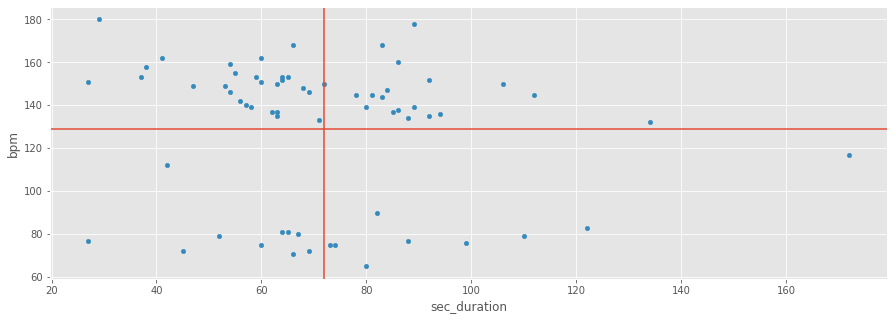

In [3]:
bpm_and_duration = fight_song_data[['bpm', 'sec_duration']]
bpm_and_duration_means = bpm_and_duration.mean()
bpm_and_duration.plot.scatter(x='sec_duration', y='bpm')
plt.axvline(bpm_and_duration_means['sec_duration'])
plt.axhline(bpm_and_duration_means['bpm'])


## Problem 3

Recreate the scatter plot only color each conference separately.


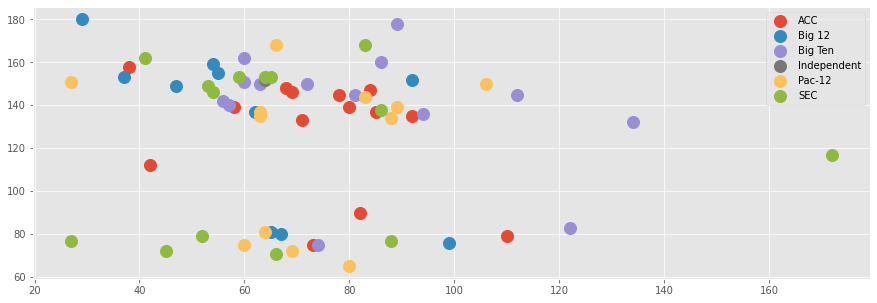

In [4]:
conferences = fight_song_data.groupby('conference')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, conference in conferences:
    ax.plot(conference.sec_duration, conference.bpm, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

Are there any patterns that standout?  What we are really looking for is if there are any regional differences between preferences for the length of the song and or the duration of the song.  Since most of these songs were written before nationally televised games regional differences might stand out.

>Nothing really standas out for the conferences.  It would be interesting to look at the data in a couple of different ways.  The is a big difference in the beats per minute, but conference doesn't seem to explain it.

## Problem 4

Speaking of when the songs were written it would be interesting to figure out when the heyday of modern fight songs is.  One way to do this is to create a histogram of the year that the songs were written.  We can then look at the distribution of the dates and determine whether they follow a clear distribution.  **Create a histogram of the date that the songs were written.**

<AxesSubplot:ylabel='Frequency'>

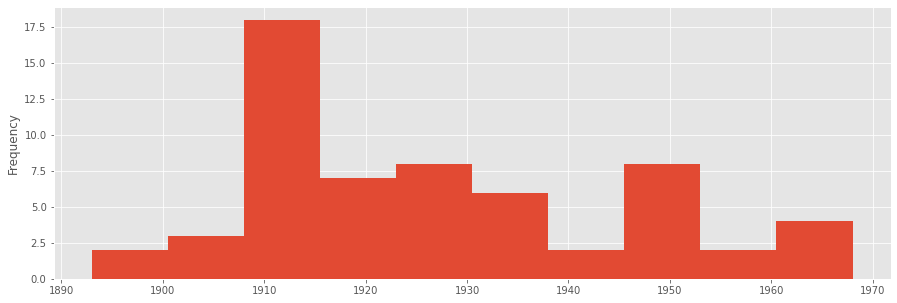

In [5]:
fight_song_data['year'] = pd.to_numeric(fight_song_data.year, errors='coerce', downcast='integer')
fight_song_data['year'].astype('Int64').plot.hist()
#.astype('Int64')

## Problem 5
The biggest problem with the data set is that BYU is missing since we are not part of a power five conference.

**Append the BYU data to the dataset**

You can find the official information about the song from [COUGAR FIGHT SONG](https://byucougars.com/story/athletics/79982/cougar-fight-song)

You can find the duration and BPM at [BPM Finder](https://songbpm.com/searches/the-cougar-song-brigham-young-university)

**Repeat the scatter plot analysis only highlighting BYU this time.**

year             1926.750000
bpm               128.800000
sec_duration       71.907692
number_fights       2.846154
trope_count         3.615385
dtype: float64


,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,...,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
school,,,,,,,,,,,,,,,,,,,,,
Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908.0,No,Yes,No,152,64,Yes,...,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr
Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947.0,Yes,Yes,No,76,99,Yes,...,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl
Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930.0,Yes,Yes,No,155,55,Yes,...,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl
Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912.0,Yes,Yes,No,137,62,No,...,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89
Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927.0,Yes,Yes,No,80,67,Yes,...,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Syracuse,ACC,Down the Field,Ralph Murphy and C. Harold Lewis,1914.0,Yes,Yes,No,137,85,Yes,...,No,Yes,Yes,No,Yes,Yes,Yes,No,6,4zrPkQ9AFljRbPy0JNW6cA
Virginia,ACC,The Good Old Song,Edward H. Craighill,1893.0,Yes,No,No,112,42,No,...,No,No,Yes,Yes,No,No,No,Yes,3,4zymLpKnHG2KURvrSUyUy8
Virginia Tech,ACC,Tech Triumph,Wilfred P. Maddux and Mattie Eppes,1919.0,Yes,Yes,No,133,71,No,...,Yes,Yes,No,Yes,Yes,Yes,No,Yes,5,5v3wGg8VMD8MMYGb8SXBss


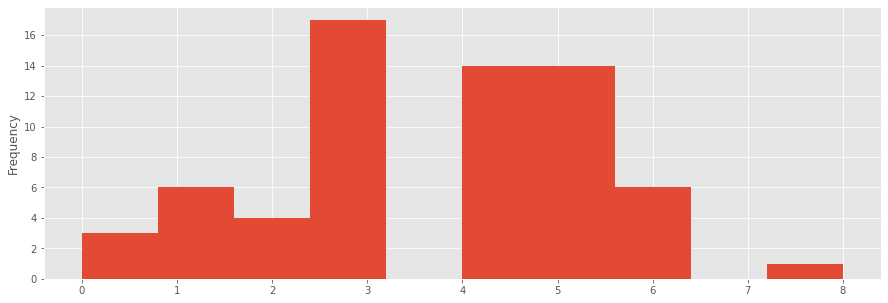

In [19]:
print(fight_song_data.mean(axis=0))
fight_song_data['trope_count'].plot.hist()


In [28]:
byu_data = {'conference' : 'Independent',
            'song_name' : 'Cougar Fight Song',
            'writers' : 'Clyde D. Sandgren', 
            'year' : 1946,
            'student_writer' : 'Yes',
            'official_song' : 'Yes',
            'contest' : 'No',
            'bpm' : 145,
            'sec_duration' : 95,
            'fight' : 'Yes',
            'number_fights' : 1,
            'victory' : 'Yes',
            'win_won' : 'No',
            'victory_win_won' : 'Yes',
            'rah' : 'Yes',
            'nonsense' : 'No',
            'colors' : 'Yes',
            'men' : 'No*',
            'opponents' : 'Yes',
            'spelling' : 'Yes',
            'trope_count' : 7,
            'spotify_id' : '71FeZngR7oqU8Pnd3XSBdp'} # Trope count count be 8 prior to change in 90's
byu_data = pd.Series(byu_data.values(), index=byu_data.keys(), name='Brigham Young University')
fight_song_data = fight_song_data.append(byu_data)
fight_song_data

,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,...,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
school,,,,,,,,,,,,,,,,,,,,,
Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908.0,No,Yes,No,152,64,Yes,...,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr
Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947.0,Yes,Yes,No,76,99,Yes,...,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl
Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930.0,Yes,Yes,No,155,55,Yes,...,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl
Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912.0,Yes,Yes,No,137,62,No,...,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89
Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927.0,Yes,Yes,No,80,67,Yes,...,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,ACC,The Good Old Song,Edward H. Craighill,1893.0,Yes,No,No,112,42,No,...,No,No,Yes,Yes,No,No,No,Yes,3,4zymLpKnHG2KURvrSUyUy8
Virginia Tech,ACC,Tech Triumph,Wilfred P. Maddux and Mattie Eppes,1919.0,Yes,Yes,No,133,71,No,...,Yes,Yes,No,Yes,Yes,Yes,No,Yes,5,5v3wGg8VMD8MMYGb8SXBss
Wake Forest,ACC,O Here's To Wake Forest,C.P. Weaver,1908.0,No,Yes,No,146,69,No,...,No,No,Yes,No,Yes,Yes,No,No,3,3u6THWNCTIdCcGIcJ1FQsN


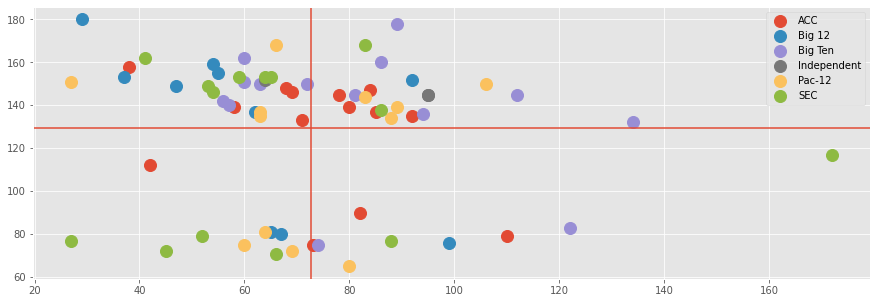

In [32]:
conferences = fight_song_data.groupby('conference')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, conference in conferences:
    ax.plot(conference.sec_duration, conference.bpm, marker='o', linestyle='', ms=12, label=name)
ax.legend()

bpm_and_duration = fight_song_data[['bpm', 'sec_duration']]
bpm_and_duration_means = bpm_and_duration.mean()
ax.axvline(bpm_and_duration_means['sec_duration'])
ax.axhline(bpm_and_duration_means['bpm'])


**How does BYU compare to the rest of the fight songs in the country?**

> BYU was on the later end of when the songs were written.  They has a previous song however so this was an update.  The song has far more tropes than most fight songs however.  Seven currently, but eight as written ties it for the most trope filled song in the data set.  It is basically a cliché.  The only ones it missed were nonsense words and win/won in the text although that was definately implied by the word vanquish.  A minor expansion of the definition for that column to include close synonymns would put BYU in first place.

## Problem 6

What additional analysis do you think would be interesting for this dataset?  Another way to phrase the question is what analytics questions are interesting about fight songs?

Is there any additinoal data that you would need to go out and find?

How woudl you go about collecting this data?

> With BYU added to the mix there are a number of interesting questions.  Answer will vary for this question, but an obvious candidate is to look at the change in tropes over time.  Did songs get more cliched as time passes?

<AxesSubplot:xlabel='year', ylabel='trope_count'>

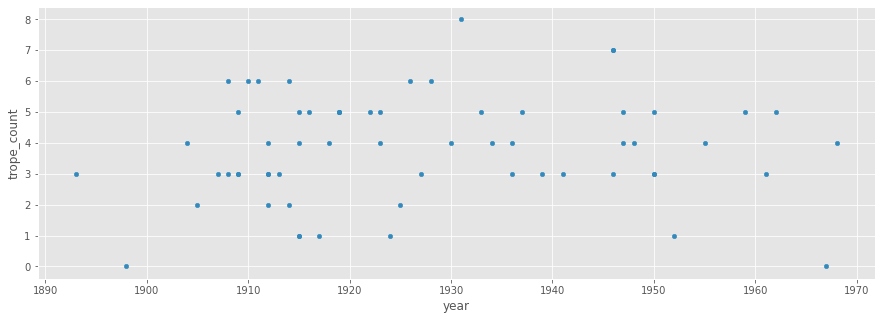

In [34]:
fight_song_data.plot.scatter(x='year', y='trope_count')